In [71]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import PDB
from time import time
from tqdm import tqdm

%matplotlib inline

In [69]:
def center_atomic_coord (x,y,z):
    
    x, y, z = x-np.mean(x), y-np.mean(y), z-np.mean(z)
    return(x, y, z) 

def quaternion_rotation(a, b, c, d, x, y, z):
    
    q00=1-2*c**2-2*d**2
    q01=2*b*c-2*d*a
    q02=2*b*d+2*c*a
    
    q10=2*b*c+2*d*a
    q11=1-2*b**2-2*d**2
    q12=2*c*d-2*b*a
    
    q20=2*b*d-2*c*a
    q21=2*c*d+2*b*a
    q22=1-2*b**2-2*c**2
    
    Q=np.array([[q00,q01,q02],[q10,q11,q12],[q20,q21,q22]])
    
    positions=np.array([x,y,z])
    rotated_positions=np.dot(Q,positions)
    
    x_rotated=rotated_positions[0]
    y_rotated=rotated_positions[1]
    z_rotated=rotated_positions[2]
    
    return(x_rotated,y_rotated,z_rotated)


def I_calculated_3 (x_atom, y_atom, z_atom, sigma, n, res):
    
    #create relevant euclidean coordinates
    x = np.linspace(min(x_atom)-1,max(x_atom)+1, res)
    y = np.linspace(min(y_atom)-1,max(y_atom)+1, res)
    
    #Initialize Icalc 
    Ixy = np.zeros((x.shape[0], x.shape[0]))    
    
    for atom in tqdm(range(len(x_atom))):
        
        #Values of the gaussians
        X = np.zeros(len(x))
        Y = np.zeros(len(x))
        
        #Selected neighbors
        i_x_selected = np.where(np.absolute(x - x_atom[atom]) <= n*sigma)
        i_y_selected = np.where(np.absolute(y - y_atom[atom]) <= n*sigma)        
        
        
        X[i_x_selected] = np.exp( -0.5 * ( ((x[i_x_selected] - x_atom[atom]) /sigma)**2) )
        Y[i_y_selected] = np.exp( -0.5 * ( ((y[i_y_selected] - y_atom[atom]) /sigma)**2) )
        
        Ixy = np.add(Ixy, X[:, None]*Y)
        
    return(np.sqrt(2*np.pi)*sigma*Ixy, x, y)


def collective_variable(Ical, I):
    
    s = np.sum(np.multiply(Ical, I))
            
    return(-s) 

def gradient_s_2(Ical, I, sigma, x, x_atom):
    
    Sxy = np.matmul(Ical, np.transpose(I))
    sgrad = np.array([np.sum( (x - x_atom[atom]) * np.diagonal(Sxy) ) for atom in range(len(x_atom))])
    
        
    return(-sgrad/(sigma**2))

  2%|▏         | 1028/55301 [00:00<00:05, 10274.72it/s]

(3, 55301) (3, 3) (3, 55301)


100%|██████████| 55301/55301 [00:03<00:00, 15444.60it/s]


s= -39710733.64930801
s_grad_x= [-9.40866082e+08 -8.95437038e+08 -9.15371858e+08 ... -1.11948501e+09
 -6.72500967e+08 -6.61739361e+08]
Execution time (sec)= 3.6690189838409424  sec


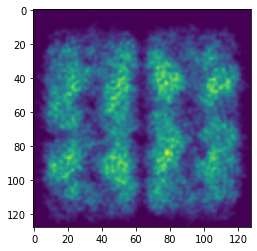

In [72]:
start_time=time()
## Parameters
n=3                #Sigma times
sigma=1            #Standar deviation of the Gaussians
#plane="xz"         #Projection plane
res=128            #Grid's resolution
q=[0,0,1/np.sqrt(2),1/np.sqrt(2)]

g=1

## Calculation and Graph of I(plane)

a=q[0]
b=q[1]
c=q[2]
d=q[3]

x_atom, y_atom, z_atom = center_atomic_coord (x_atom, y_atom, z_atom)
x_atom, y_atom, z_atom = quaternion_rotation(a, b, c, d, x_atom, y_atom, z_atom)

Ixy, x, y = I_calculated_3(x_atom, y_atom, z_atom, sigma, n, res)
#np.savetxt("Ical_1xck_tens_sigma_{}_res_{}_{}.txt".format(sigma,res,plane), Ic, fmt="%s")
plt.imshow(Ixy)
#plt.rcParams["figure.figsize"] = (5,5)
#plt.savefig("Ical_1xck_tens_sigma_{}_res_{}_{}.png".format(sigma,res,plane))
noise=np.random.normal(0, g, Ixy.shape)
I=Ixy+noise

s=collective_variable(Ixy,I)

sgrad=gradient_s_2(Ixy, I, sigma, x, x_atom)
print("s=", s)
print("s_grad_x=", sgrad)
final_time=time()-start_time
print("Execution time (sec)=", final_time," sec")
#print("Execution time (min)=", final_time/60," min")
#print("Execution time (hours)=", final_time/3600," hours")

In [ ]:
#Example: N atoms in random coordinates
N=4
n=3                         #Sigma times
res=128                    #Resolution
sigma=1*10**(-1)            #Standar deviation of the Gaussians
q=[0,0, 0, 0]

g=0.1


x_a=np.random.random(N) * 2 - 1   #x random atomic coordinates
y_a=np.random.random(N) * 2 - 1   #y random atomic coordinates
z_a=np.random.random(N) * 2 - 1   #y random atomic coordinates

#for atom in range(n_atoms):
#    print("ATOM", atom)
#    print("xsel=", list(i_sel (x,x_a[atom],sigma,n)))
#    print("ysel=", list(i_sel (y,y_a[atom],sigma,n)))
#    print("")

Ixy, x, y = I_calculated_2 (q, x_a, y_a, z_a, sigma, n, res)
#print(Ixy)
plt.imshow(Ixy)
plt.show()

noise=np.random.normal(0, g, Ixy.shape)
I=Ixy+noise
s=collective_variable(Ixy,I)
sgrad=gradient_s(Ixy, I, sigma, x, x_a)
sgrad3=gradient_s_2(Ixy, I, sigma, x, x_a)
print("s =", s)
print("sgrad_x =", sgrad)
print("sgrad_x_3 =", sgrad3)

In [ ]:
#Importation of the 1xck's PDB to extract XYZ atomic coordinates
parser = PDB.PDBParser()
io = PDB.PDBIO()
struct = parser.get_structure('1xck','1xck.pdb')
x_atom=[]
y_atom=[]
z_atom=[]
for chains in struct:
    for chain in chains:
        for residue in chain:                             
            for atom in residue:
                x_atom.append(atom.get_vector()[0])
                y_atom.append(atom.get_vector()[1])
                z_atom.append(atom.get_vector()[2])
x_atom=np.array(x_atom)
y_atom=np.array(y_atom)
z_atom=np.array(z_atom)

In [3]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])


B = np.array([[5, 6],
              [7, 8]])

C = np.matmul(A, B)

C, np.sum(C), np.diagonal(C)

(array([[19, 22],
        [43, 50]]),
 134,
 array([19, 50]))